In [5]:
# conda create --name Env_VectoRaster

^C

Note: you may need to restart the kernel to use updated packages.


In [1]:
#conda create -n envFjell
#conda activate envFjell
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install geopandas
##conda install pyogrio # følger med geopandas
#conda install fiona
#conda install rasterio
# conda install pyarrow

SyntaxError: invalid syntax (773661883.py, line 3)

In [7]:
import geopandas as gpd
import pyogrio
import fiona
import rasterio as rio
import numpy as np 
# import pyarrow
# pyarrow fungerer ikke i min conda env
import os

In [20]:
os.path.isfile("c:/Users/endre/OneDrive/DiverseProsjekt/Data/Edelløvtrær.gpkg")

True

In [28]:
# path = "c:/Users/endre/OneDrive/DiverseProsjekt/Data/Edelløvtrær.gpkg"
path = "c:/data/0000_25833_SR16_GDB.gdb"
a = gpd.read_file(path,engine='pyogrio', use_arrow = True)

MemoryError: Unable to allocate 3.87 GiB for an array with shape (61, 8524824) and data type float64

<Axes: >

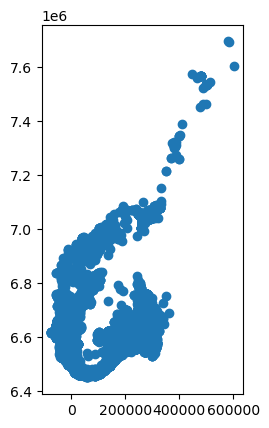

In [22]:
a.plot()

# GBIF

In [47]:
import requests
import pandas as pd
base_url = "https://api.gbif.org/v1/occurrence/search?"
countryCode = "NO"
def get_GBIF_response(base_url, offset, params, df):
    """Performs an API call to the base URL with additional parameters listed in 'params'. Concatenates response to a Pandas DataFrame, 'df'."""
    
    #Construct the query URL
    query = base_url+'&'+f'offset={offset}'
    for each in params:
        query = query+'&'+each
            
    #Call API
    #print(query)
    response = requests.get(query)
    
    #If call is successful, add data to df
    if response.status_code != 200:
        print(f"API call failed at offset {offset} with a status code of {response.status_code}.")
    else:
        result = response.json()
        df_concat = pd.concat([df, pd.DataFrame.from_dict(result['results'])], axis = 0, ignore_index = True, sort = True)
        endOfRecords = result['endOfRecords']
        return df_concat, endOfRecords, response.status_code
#set parameters for API call
params0 = ['limit=1000', 'publishingCountry=NO','hasGeospatialIssue=false', 'hasCoordinate=true','year=2010,2025']

In [48]:
# https://api.gbif.org/v1/occurrence/search?scientificName=Herminium%20monorchis&publishingCountry=NO&hasCoordinate=true&hasGeospatialIssue=false

In [49]:
#Set up a simple while loop to continue downloading until the last #page
df = pd.DataFrame()
endOfRecords = False
offset = 0
status = 200

species = ['Herminium monorchis','Epipactis palustris']
pre = 'scientificName='


for i in species:
    print(i)
    params = params0.copy()
    params.append(pre+i)
    while endOfRecords == False and status == 200:
        df, endOfRecords, status = get_GBIF_response(base_url, offset, params, df)
        print(offset)
        offset = len(df) + 1
    endOfRecords = False
    offset = 0
    status = 200

Herminium monorchis
0
301
Epipactis palustris
0
808


In [50]:
df

,acceptedScientificName,acceptedTaxonKey,associatedReferences,basisOfRecord,catalogNumber,class,classKey,collectionCode,collectionKey,continent,...,startDayOfYear,stateProvince,taxonKey,taxonRank,taxonRemarks,taxonomicStatus,type,verbatimIdentification,vernacularName,year
0,Herminium monorchis (L.) R.Br.,5310578,NaN,HUMAN_OBSERVATION,NaN,Liliopsida,196,BioFokus,NaN,EUROPE,...,154.0,Østfold,5310578,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2024
1,Herminium monorchis (L.) R.Br.,5310578,https://www.artsobservasjoner.no/Sighting/3549...,HUMAN_OBSERVATION,35492286,Liliopsida,196,so2-vascular,NaN,EUROPE,...,172.0,Østfold,5310578,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2024
2,Herminium monorchis (L.) R.Br.,5310578,https://www.artsobservasjoner.no/Sighting/3506...,HUMAN_OBSERVATION,35061161,Liliopsida,196,so2-vascular,NaN,EUROPE,...,182.0,Østfold,5310578,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2024
3,Herminium monorchis (L.) R.Br.,5310578,https://www.artsobservasjoner.no/Sighting/3622...,HUMAN_OBSERVATION,36222366,Liliopsida,196,so2-vascular,NaN,EUROPE,...,181.0,Østfold,5310578,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2024
4,Herminium monorchis (L.) R.Br.,5310578,https://www.artsobservasjoner.no/Sighting/3489...,HUMAN_OBSERVATION,34891139,Liliopsida,196,so2-vascular,NaN,EUROPE,...,168.0,Østfold,5310578,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,Epipactis palustris (L.) Crantz,5319226,https://www.artsobservasjoner.no/Sighting/1281...,HUMAN_OBSERVATION,12814228,Liliopsida,196,so2-vascular,NaN,EUROPE,...,191.0,Viken,5319226,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2015
803,Epipactis palustris (L.) Crantz,5319226,https://www.artsobservasjoner.no/Sighting/1287...,HUMAN_OBSERVATION,12873729,Liliopsida,196,so2-vascular,NaN,EUROPE,...,201.0,Viken,5319226,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2015
804,Epipactis palustris (L.) Crantz,5319226,https://www.artsobservasjoner.no/Sighting/1290...,HUMAN_OBSERVATION,12902249,Liliopsida,196,so2-vascular,NaN,EUROPE,...,196.0,Viken,5319226,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2015
805,Epipactis palustris (L.) Crantz,5319226,https://www.artsobservasjoner.no/Sighting/1378...,HUMAN_OBSERVATION,13789640,Liliopsida,196,so2-vascular,NaN,EUROPE,...,201.0,Viken,5319226,SPECIES,NaN,ACCEPTED,NaN,NaN,NaN,2015
